# Data Exploration

In [2]:
%matplotlib inline

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


Bad key text.latex.preview in file /Users/eerichmo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/eerichmo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/eerichmo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

In [3]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select * from fires""", conn)

df_causes = pd.read_sql_query("""select distinct cause_code, cause_descr as cause from fires""", conn)

df_years = pd.read_sql_query("""select distinct year from fires""", conn)

print(df_fires.isna().any())

conn.close()

df_fires.describe().transpose()

NameError: name 'pd' is not defined

  fire_size_class  count  smallest    largest
0               A  63635     0.001       0.25
1               B  49445     0.260       9.90
2               C   5770    10.000      99.00
3               D   1248   100.000     299.00
4               E    690   300.000     999.00
5               F    462  1000.000    4913.00
6               G    285  5000.000  315578.80


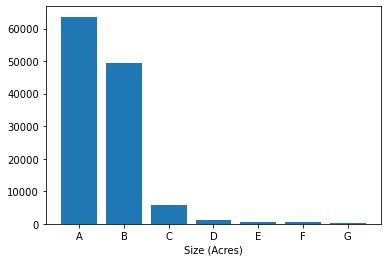

In [4]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fire_class = pd.read_sql_query("""
select fire_size_class, count(*) as count, min(fire_size) as smallest, max(fire_size) as largest
from fires
group by fire_size_class
order by fire_size_class
""", conn)

print(df_fire_class)
plt.bar('fire_size_class', 'count', data = df_fire_class)
plt.xlabel('Size (Acres)')

conn.close()

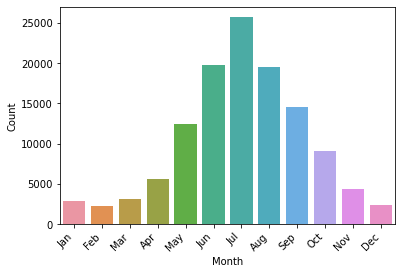

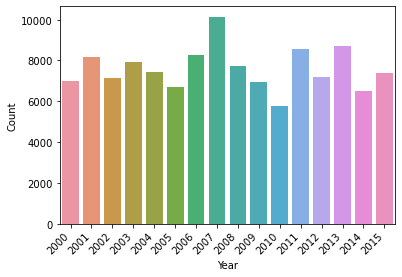

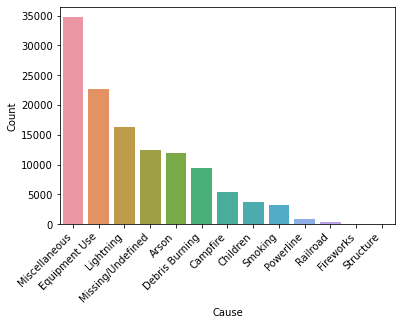

In [21]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select * from fires""", conn)

conn.close()

df_month_count = df_fires.groupby(['month']).size().reset_index(name = 'count').sort_values('count')
sns.barplot(data = df_month_count, y = 'count', x = 'month')
plt.xlabel('Month')
plt.xticks(
  range(12),
  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
  rotation=45,
  ha='right')
plt.ylabel('Count')
plt.show()

df_year_count = df_fires.groupby(['year']).size().reset_index(name = 'count').sort_values('count')
sns.barplot(data = df_year_count, y = 'count', x = 'year')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

causes_range = range(len(df_causes))
df_cause_count = df_fires.groupby(['cause_descr']).size().reset_index(name = 'count').sort_values('count', ascending=False)
sns.barplot(data = df_cause_count, y = 'count', x = 'cause_descr')
plt.xlabel('Cause')
plt.xticks(causes_range, rotation=45, ha='right')
plt.ylabel('Count')
plt.show()


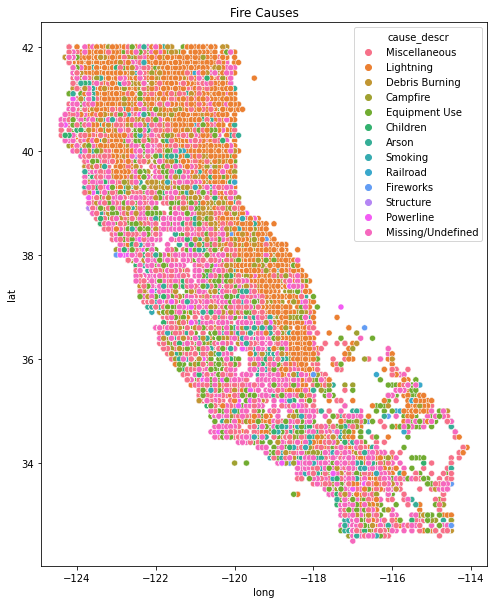

In [71]:
plt.figure(figsize=(8, 10))
plt.title('Fire Causes')
sns.scatterplot(x='long', y='lat', data=df_fires, hue='cause_descr')
plt.show()

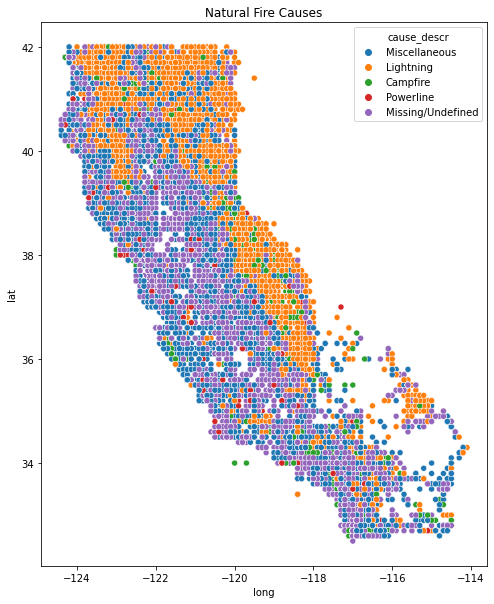

In [117]:
df_fires_natural = df_fires[
  df_fires.cause_descr.isin(
    ['Miscellaneous', 'Lightning', 'Powerline', 'Missing/Undefined', 'Debris Buring', 'Campfire']
  )]

plt.figure(figsize=(8, 10))
plt.title('Natural Fire Causes')
sns.scatterplot(x='long', y='lat', data=df_fires_natural, hue='cause_descr')
plt.show()

In [9]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_soil = pd.read_sql_query("""select * from soil""", conn)

print(df_soil.describe())

conn.close()

             long        lat         fips   latitude   longitude    elevation  \
count   58.000000  58.000000    58.000000  58.000000   58.000000    58.000000   
mean  -120.741379  37.836207  6058.000000  37.838006 -120.749521   621.551724   
std      1.927368   2.160304    33.773757   2.158956    1.938832   666.561487   
min   -124.000000  33.000000  6001.000000  33.023604 -123.980998     0.000000   
25%   -122.000000  36.650000  6029.500000  36.648278 -122.034464    91.750000   
50%   -120.900000  38.050000  6058.000000  38.036634 -120.916086   425.500000   
75%   -119.825000  39.275000  6086.500000  39.246954 -119.839862   823.250000   
max   -115.400000  41.700000  6115.000000  41.749903 -115.355395  2630.000000   

       slope_005  slope_005_02  slope_02_05  slope_05_10  ...  \
count  58.000000     58.000000    58.000000    58.000000  ...   
mean    0.042236      0.185560     0.115616     0.118331  ...   
std     0.078355      0.266131     0.113343     0.103988  ...   
min     0.

In [10]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_weather_county = pd.read_sql_query("""select * from weather_county""", conn)

conn.close()

In [11]:
print(df_weather_county.describe())

                year           fips  precipitation       pressure  \
count  338952.000000  338952.000000  338952.000000  338952.000000   
mean     2007.498973    6058.000000       1.600754      94.040500   
std         4.609853      33.481387       5.391370       6.032349   
min      2000.000000    6001.000000       0.000000      72.920000   
25%      2003.750000    6029.000000       0.000000      91.170000   
50%      2007.500000    6058.000000       0.010000      95.800000   
75%      2011.250000    6087.000000       0.290000      98.920000   
max      2015.000000    6115.000000     107.760000     103.240000   

         humidity_2m        temp_2m  temp_dew_point_2m  temp_wet_bulb_2m  \
count  338952.000000  338952.000000      338952.000000     338952.000000   
mean        5.761598      14.144045           3.925408          3.977946   
std         1.914769       8.004082           5.628715          5.553526   
min         0.620000     -18.310000         -23.100000        -21.630000  

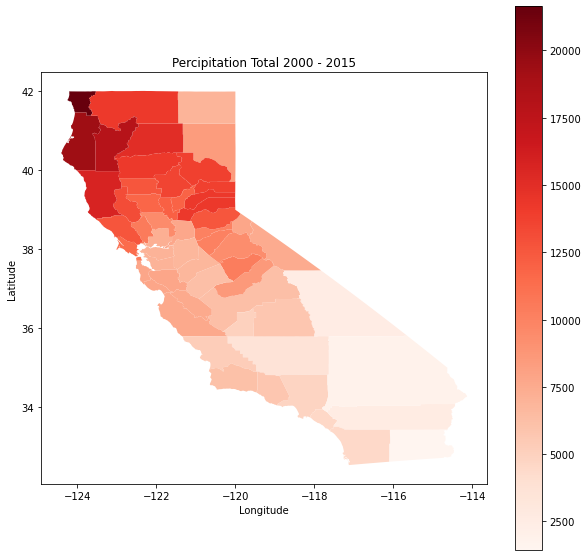

In [12]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_precip = pd.read_sql_query("""select precip.total, long, lat, geo_multipolygon
from (
  select sum(precipitation) as total, fips
  from weather_county
  group by fips
) as precip
inner join county on
  county.fips = precip.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_precip.geo_multipolygon)
gdf_precip = gpd.GeoDataFrame(df_precip, geometry=gs_county)

gdf_precip.plot(column='total', cmap='Reds', ax=ax)

bar_precip = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_precip.total.min(), vmax=df_precip.total.max()))
fig.colorbar(bar_precip)

plt.title(f'Percipitation Total {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

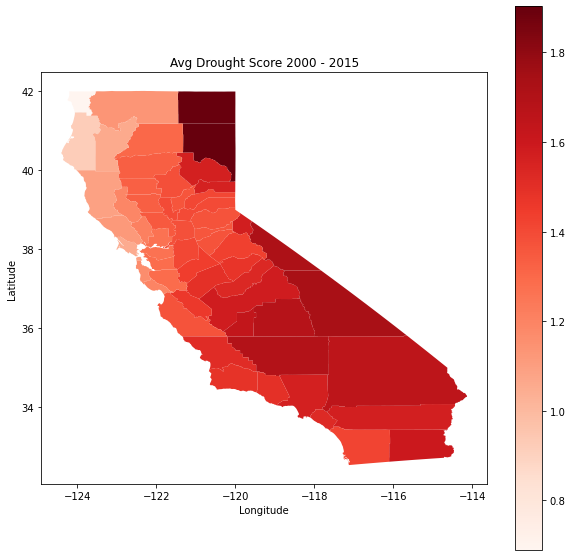

In [150]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_drought = pd.read_sql_query("""select drought.score, long, lat, geo_multipolygon
from (
  select avg(drought_score) as score, fips
  from weather_county
  group by fips
) as drought
inner join county on
  county.fips = drought.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_drought.geo_multipolygon)
gdf_drought = gpd.GeoDataFrame(df_drought, geometry=gs_county)

gdf_drought.plot(column='score', cmap='Reds', ax=ax)

bar_drought = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_drought.score.min(), vmax=df_drought.score.max()))
fig.colorbar(bar_drought)

plt.title(f'Avg Drought Score {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

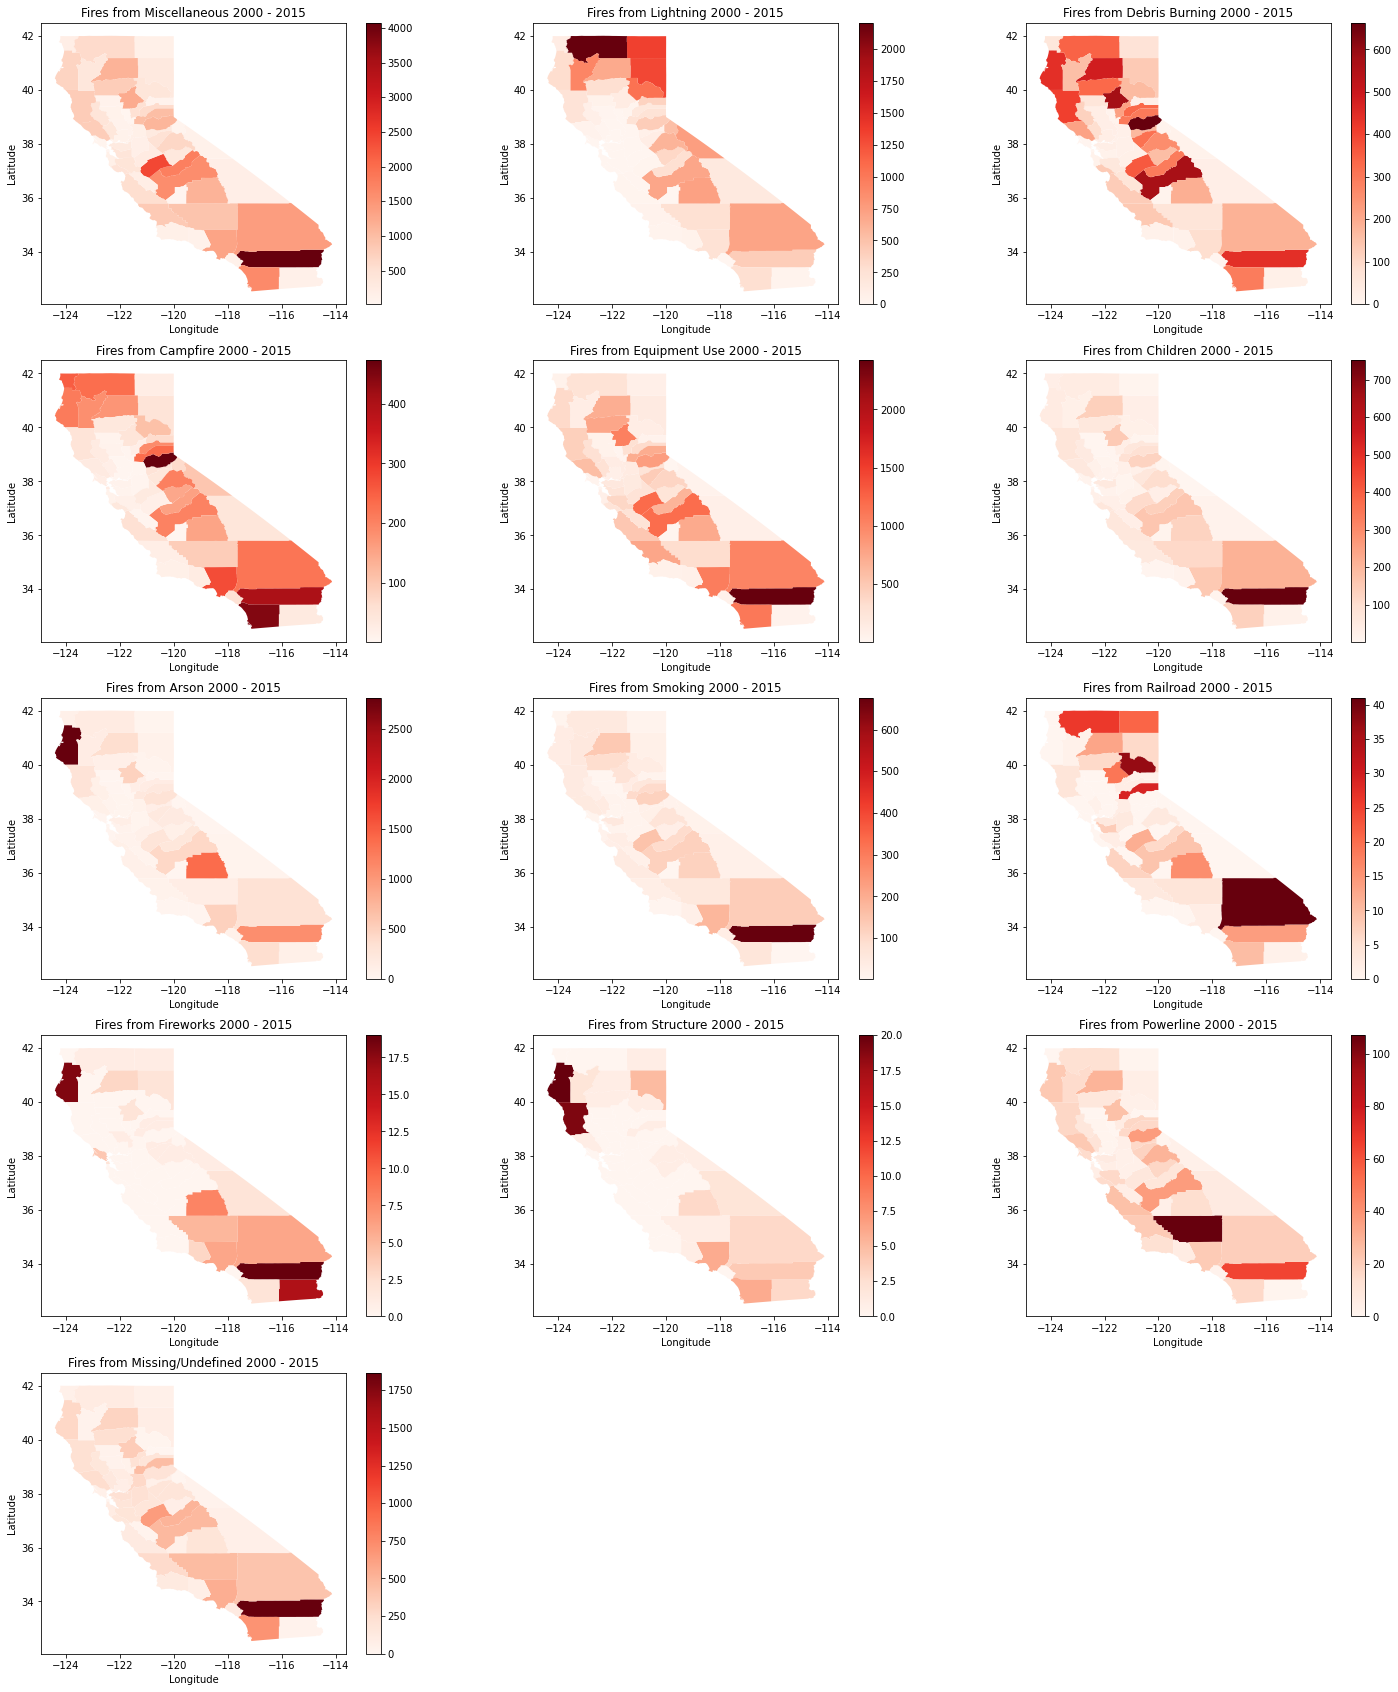

In [33]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""
select
  ifnull(fire_counts.total, 0) as total, causes.cause, long, lat, geo_multipolygon
from county
cross join (
  select distinct cause_descr as cause
  from fires
) as causes
left outer join (
  select count(*) as total, cause_descr as cause, fips
  from fires
  group by fips, cause_descr
) as fire_counts on
  fire_counts.fips = county.fips
  and fire_counts.cause = causes.cause
""", conn)

conn.close()

gs_county = gpd.GeoSeries.from_wkt(df_fires.geo_multipolygon)
gdf_fires = gpd.GeoDataFrame(df_fires, geometry=gs_county)

fig = plt.figure(figsize=(25, 30))

i = 1
for cause in df_causes.cause:
  ax = plt.subplot(5, 3, i)

  gdf_cause = gdf_fires[gdf_fires.cause == cause]
  gdf_cause.plot(column='total', cmap='Reds', ax=ax)

  bar_fires = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=gdf_cause.total.min(), vmax=gdf_cause.total.max()) )
  fig.colorbar(bar_fires)

  plt.title(f'Fires from {cause} {df_years.year.min()} - {df_years.year.max()}')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')

  i += 1

In [38]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_features = pd.read_sql_query("""
select
	weather_county.month,
	weather_county.year,
	weather_county.precipitation,
	weather_county.temp_2m,
	soil.elevation,
	soil.slope_10_15,
	soil.slope_15_30,
	soil.slope_30_45,
	soil.aspect_east,
	soil.aspect_south,
	soil.aspect_west,
	soil.forest_land,
	soil.cultivated_land,
	soil.nutrient_retention
from weather_county
inner join soil
where
  soil.fips = weather_county.fips
	and soil.fips != 6065
	and weather_county.year in (2000, 2001, 2002, 2003)
""", conn)

# Ignoring FIPS = 6065, Riverside, since it has a disproportionate number of 'Miscellaneous' fires 

conn.close()

df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,83277.0,6.522930,3.448724,1.00,4.000000,7.000000,10.000000,12.000000
year,83277.0,2001.498973,1.118346,2000.00,2000.000000,2001.000000,2002.000000,2003.000000
precipitation,83277.0,1.681943,5.117634,0.00,0.000000,0.040000,0.480000,90.970000
temp_2m,83277.0,14.103538,8.000421,-15.36,8.510000,13.410000,20.170000,38.870000
elevation,83277.0,619.859649,666.440912,0.00,87.000000,407.000000,825.000000,2630.000000
slope_10_15,83277.0,0.099600,0.073382,0.00,0.035000,0.106500,0.157100,0.253500
slope_15_30,83277.0,0.244028,0.184715,0.00,0.023400,0.275800,0.404000,0.556000
slope_30_45,83277.0,0.110277,0.106849,0.00,0.000100,0.081900,0.203500,0.390100
aspect_east,83277.0,0.164491,0.096043,0.00,0.082500,0.173000,0.226800,0.397800
aspect_south,83277.0,0.191093,0.112424,0.00,0.070300,0.201800,0.289000,0.357500


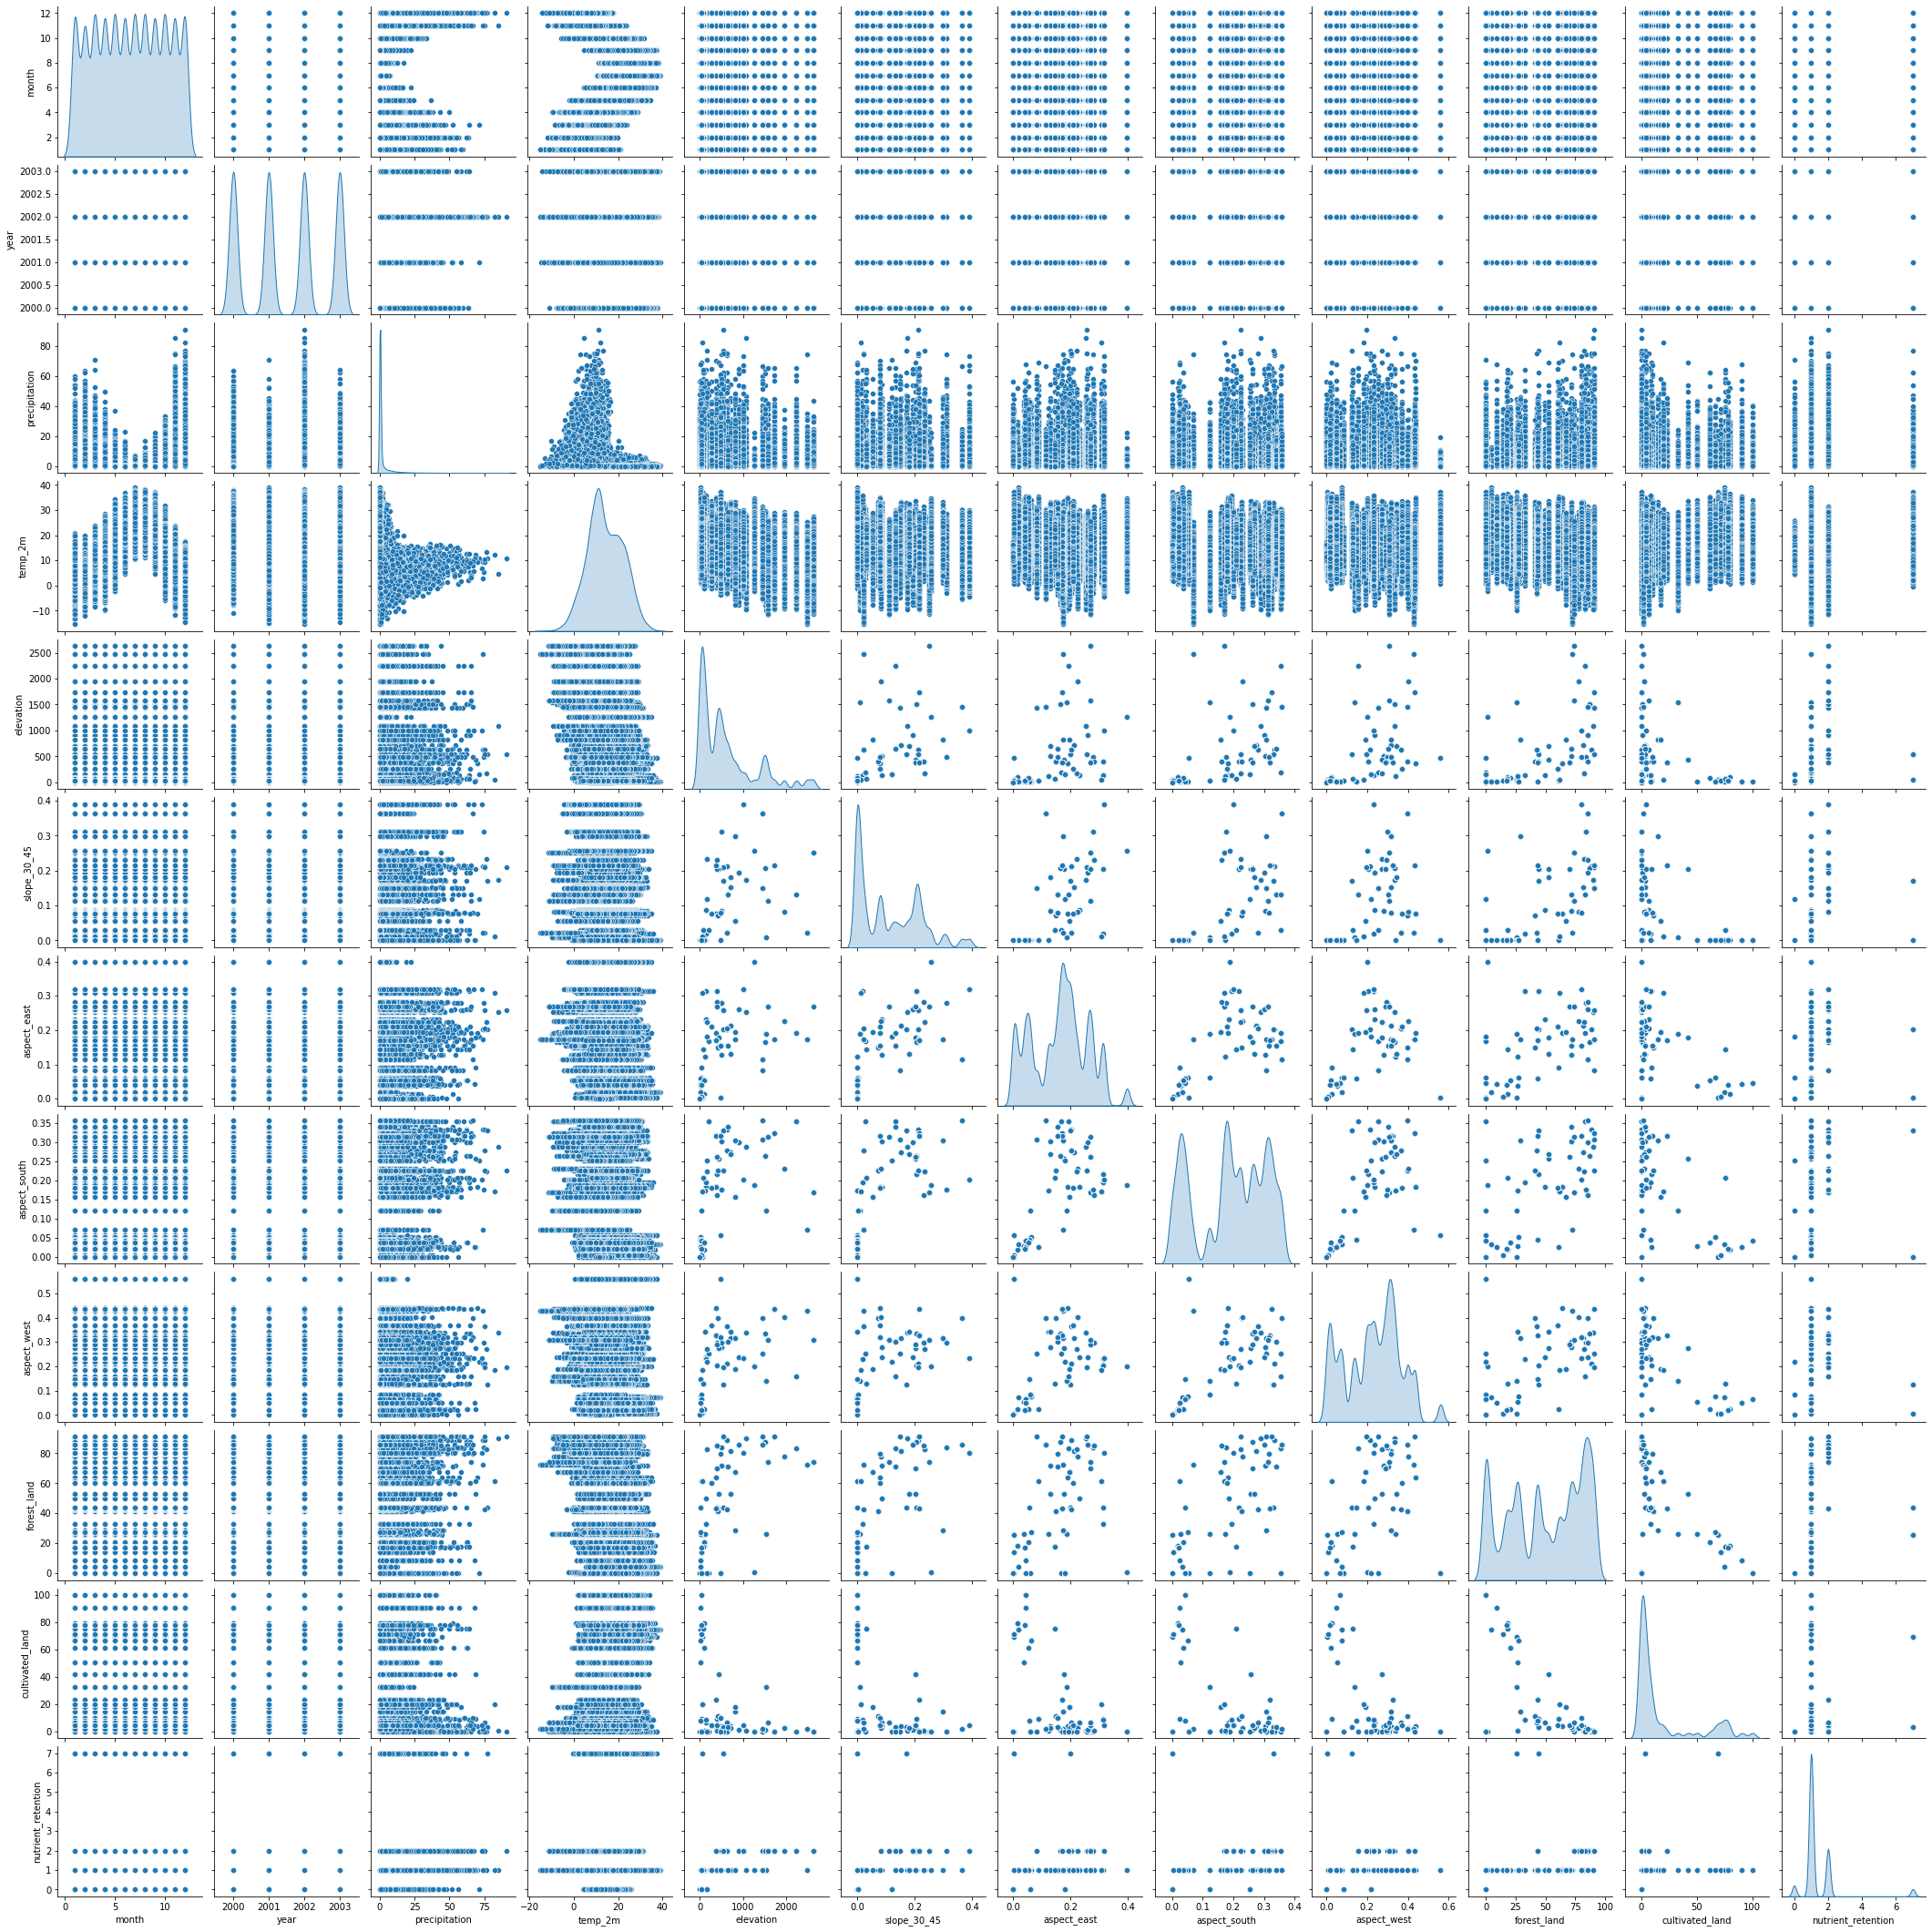

In [37]:
sns.pairplot(df_features, diag_kind='kde')

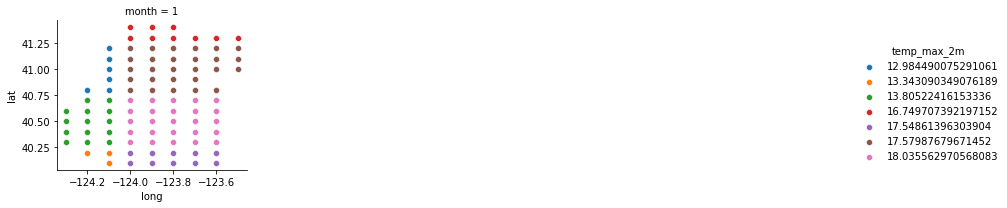

In [9]:
import datetime

conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_max_temp = pd.read_sql_query("""
select month, lat, long, avg(temp_max_2m) as temp_max_2m
from weather_geo
where
  fips = 6023
group by lat, long
order by month
""", conn)

conn.close()

# fig = plt.figure(figsize=(25, 30))

g = sns.FacetGrid(df_max_temp, col="month", col_wrap=4, hue="temp_max_2m", height=8)
g.map(sns.scatterplot, "long", "lat")
g.add_legend()

# for i in range(1, 13):
#   ax = plt.subplot(4, 3, i)
#   mon = datetime.datetime.strptime(str(i), "%m").strftime("%b")

#   plt.title(f'Avg Max Temp for {mon}')
#   sns.scatterplot(x='long', y='lat', data=df_max_temp[df_max_temp.month == i], hue='temp_max_2m')

In [56]:
import shapely.wkt
from shapely.geometry import Point
import math

conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_county = pd.read_sql_query("""select * from county where fips = 6023""", conn)
df_fire_size = pd.read_sql_query("""select fips, lat, long, latitude, longitude, fire_size from fires where lat = 40.7 and long = -123.9""", conn)
print(df_fire_size)
conn.close()

for fips, county in df_county.iterrows():
  name = county['name']
  geo = shapely.wkt.loads(county.geo_multipolygon)

  long_min = round(geo.bounds[0], 1)
  long_max = round(geo.bounds[2], 1)

  lat_min = round(geo.bounds[1], 1)
  lat_max = round(geo.bounds[3], 1)

  print(f'{county.long} {county.lat}')
  print(f'{name} southwest to northeast: ({lat_min}, {long_min}) to ({lat_max}, {long_max})')

  for long in range(int(long_min * 10), int(long_max * 10)):
    for lat in range(int(lat_min * 10), int(lat_max * 10)):
      point = Point(long / 10, lat / 10)

      if geo.contains(point):
        for i, fire in df_fire_size.iterrows():
          degree_km = 10000/90 # ~111.11 km per degree
          area_km = fire.fire_size * 0.00404686 # acre -> km2
          area_degree = area_km / math.pow(degree_km, 2)
          fire_radius = math.sqrt(area_degree / math.pi)

          fire_pt = Point(fire.long, fire.latitude)
          fire_pt_exact = Point(fire.longitude, fire.latitude)

          if (fire_pt == point):
            print(f'{fips}: {point} is {fire_pt.distance(point)} from fire location {fire_pt} with radius {fire_radius} ({fire.fire_size}')


    fips   latitude   longitude  fire_size
0   6023  40.656311 -123.882031        2.0
1   6023  40.700667 -123.898667        0.1
2   6023  40.656631 -123.918189        0.5
3   6023  40.670667 -123.928950        1.0
4   6023  40.664489 -123.885758        0.1
5   6023  40.669400 -123.881100       14.4
6   6023  40.713889 -123.885000       10.0
7   6023  40.668889 -123.881944       15.0
8   6023  40.669833 -123.909383        2.0
9   6023  40.746417 -123.938000        1.0
10  6023  40.716400 -123.949550        0.2
11  6023  40.671190 -123.899990        5.8
12  6023  40.718083 -123.942267        1.5
13  6023  40.665733 -123.910550        0.3
14  6023  40.650000 -123.884167        0.2
15  6023  40.663833 -123.897500       27.0
-123.9 40.7
Humboldt southwest to northeast: (40.0, -124.4) to (41.5, -123.4)


### Test-Train-Split

#### Splitting for 2000-2015

- Train 2000-13 (13 years)
- Validation 2013-14 (1 year)
- Test 2014-15 (1 years)

#### How to Process 13 years of data?

- NN might allow batching
- Regression models for 0% - 100% per long/lat grid (55x55 km)
- Reduce long/lat grid (11x11 km)
- Visualize with heatmap
- Focus on origin long/lat

#### Models

1.  Linear
2.  Random Forest Regression
3.  ...any regression model